In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = pd.read_csv("/online_shoppers_intention.csv")

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


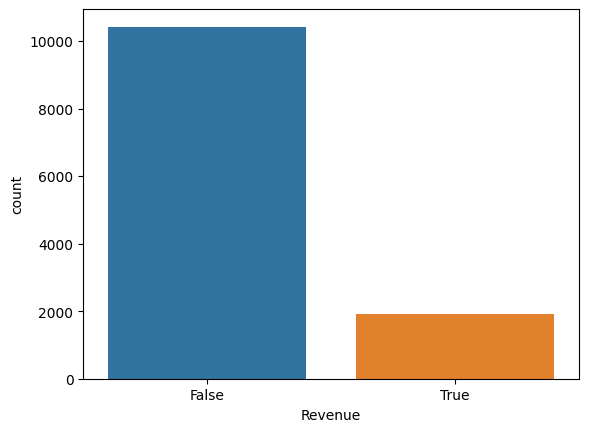

In [ ]:
sns.countplot(x='Revenue', data=data)
plt.show()

<ipython-input-6-7dbab210da8b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


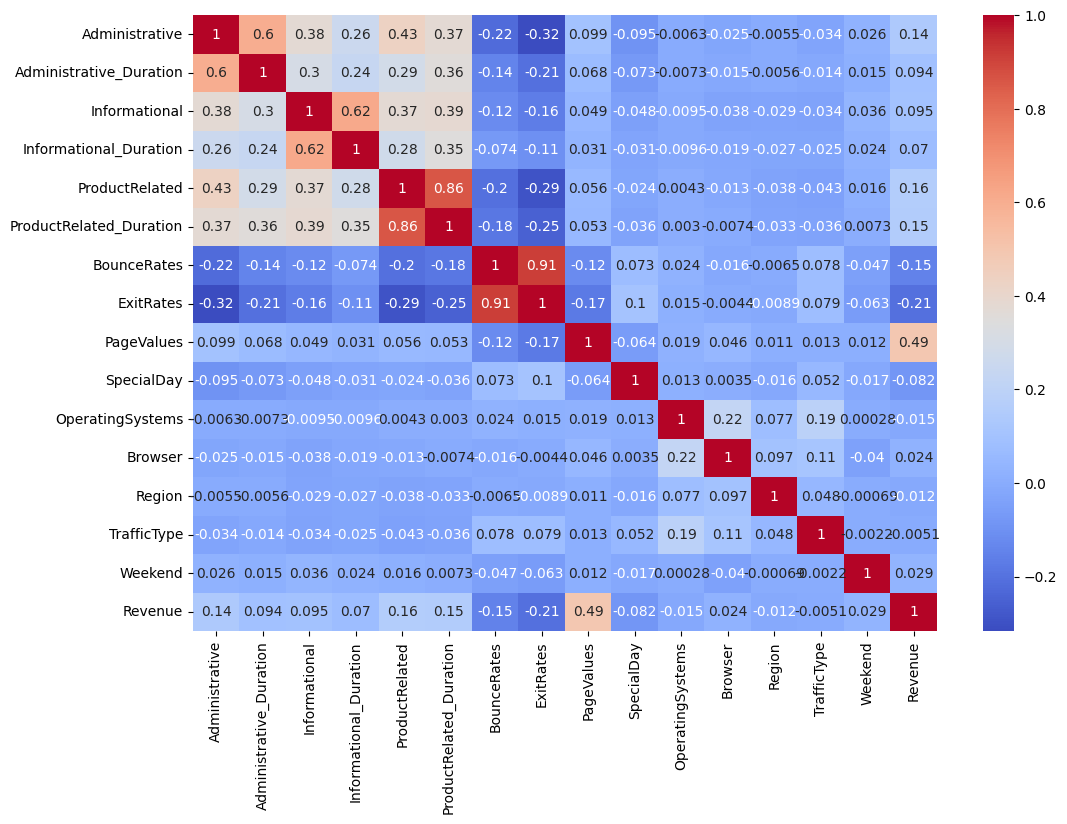

In [ ]:
sns.countplot(x='Revenue', data=data)
plt.show()

<Axes: title={'center': 'Distribution of number of pages of this administrative type user visited '}, xlabel='Administrative', ylabel='count'>

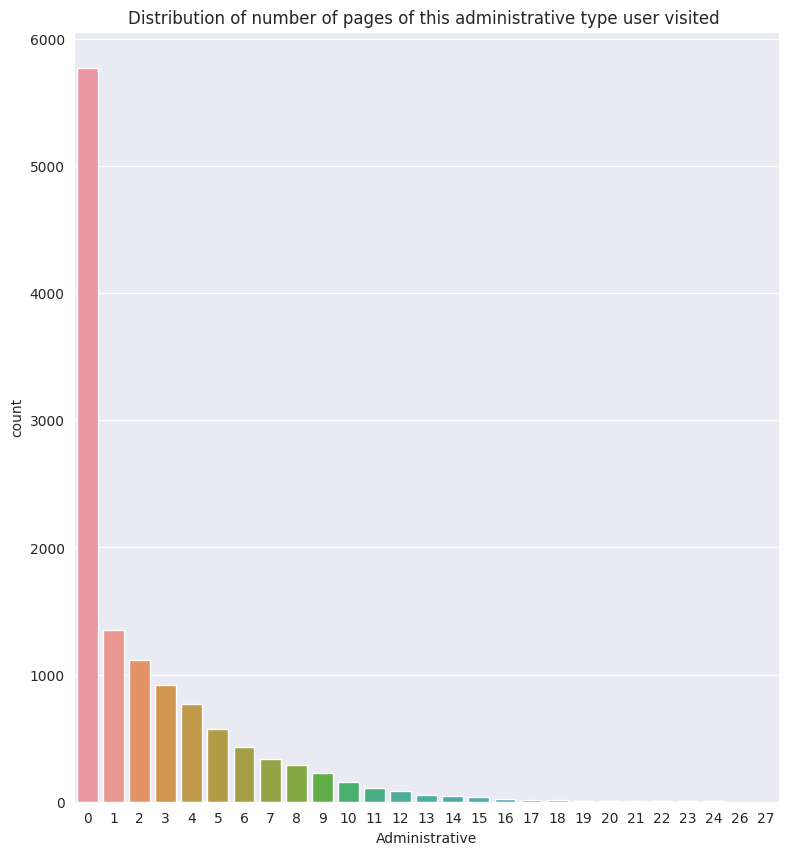

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Distribution of number of pages of this administrative type user visited ')
sns.countplot(x = data['Administrative'])

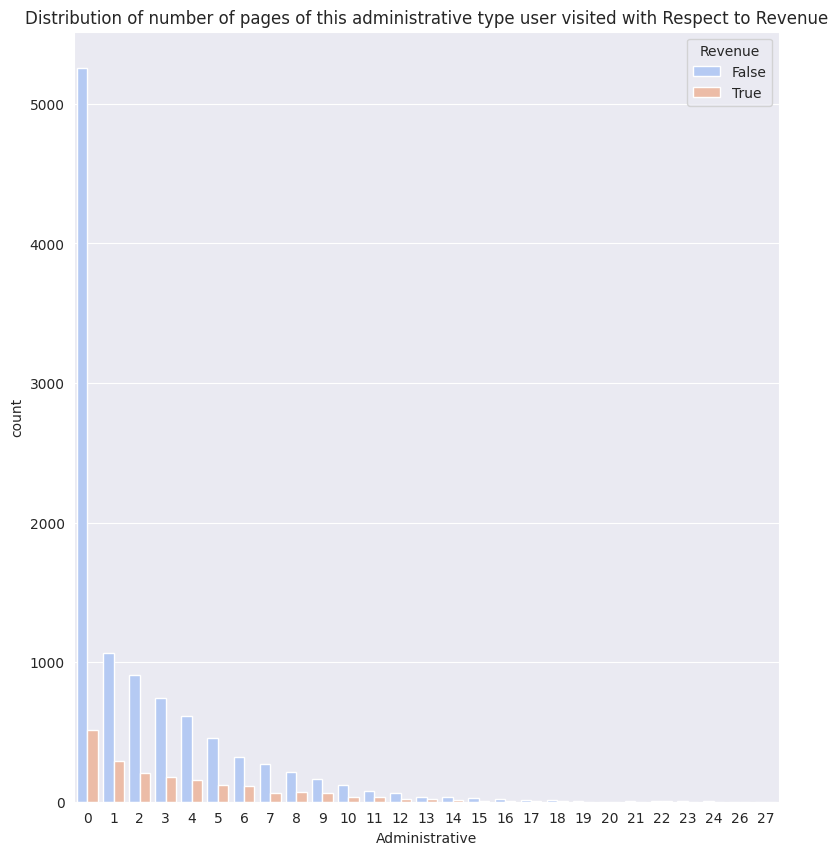

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,2)
plt.title('Distribution of number of pages of this administrative type user visited with Respect to Revenue')
sns.countplot(x= 'Administrative', hue = 'Revenue', data = data, palette='coolwarm')
plt.show()

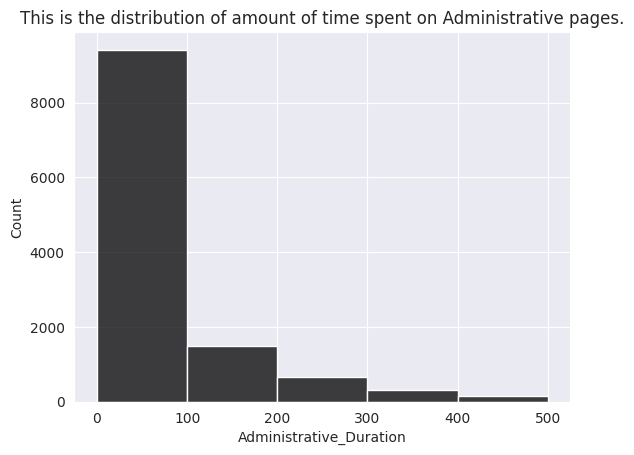

In [ ]:
sns.histplot(data['Administrative_Duration'], bins = [0,100,200,300,400,500],color='Black')
plt.title('This is the distribution of amount of time spent on Administrative pages.')
plt.show()

<ipython-input-10-188107a11e3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


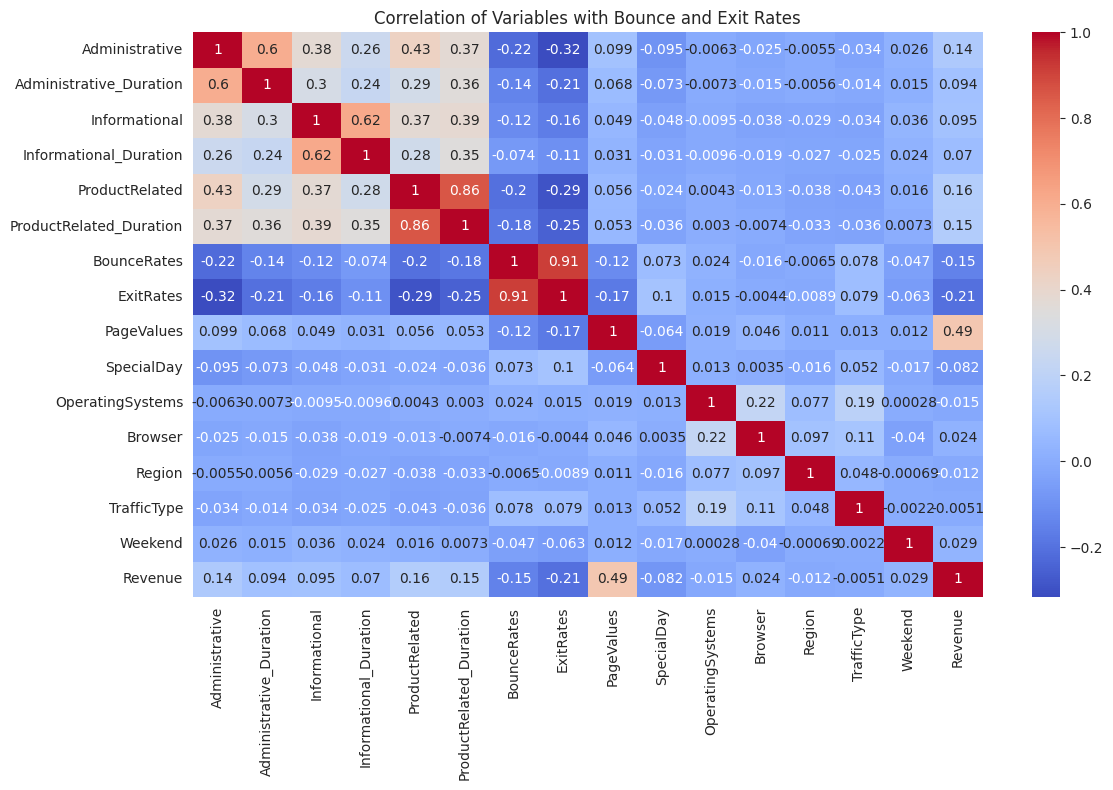

In [ ]:
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation of Variables with Bounce and Exit Rates")
plt.tight_layout()

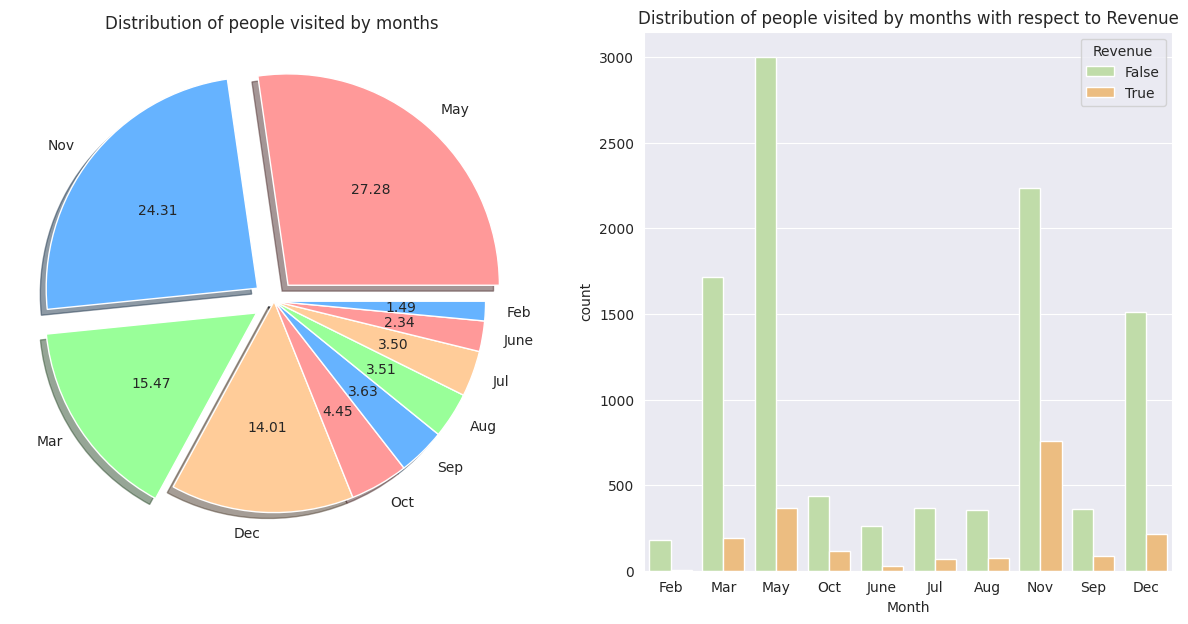

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Distribution of people visited by months ')
plt.pie(x = data['Month'].value_counts(),
       labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'],
       autopct='%.2f',
       colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
       shadow = True,
       explode = (0.1,0.1,0.1,0,0,0,0,0,0,0))

plt.subplot(1,2,2)
plt.title('Distribution of people visited by months with respect to Revenue')
sns.countplot(x= 'Month', hue = 'Revenue', data = data, palette='Spectral_r')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

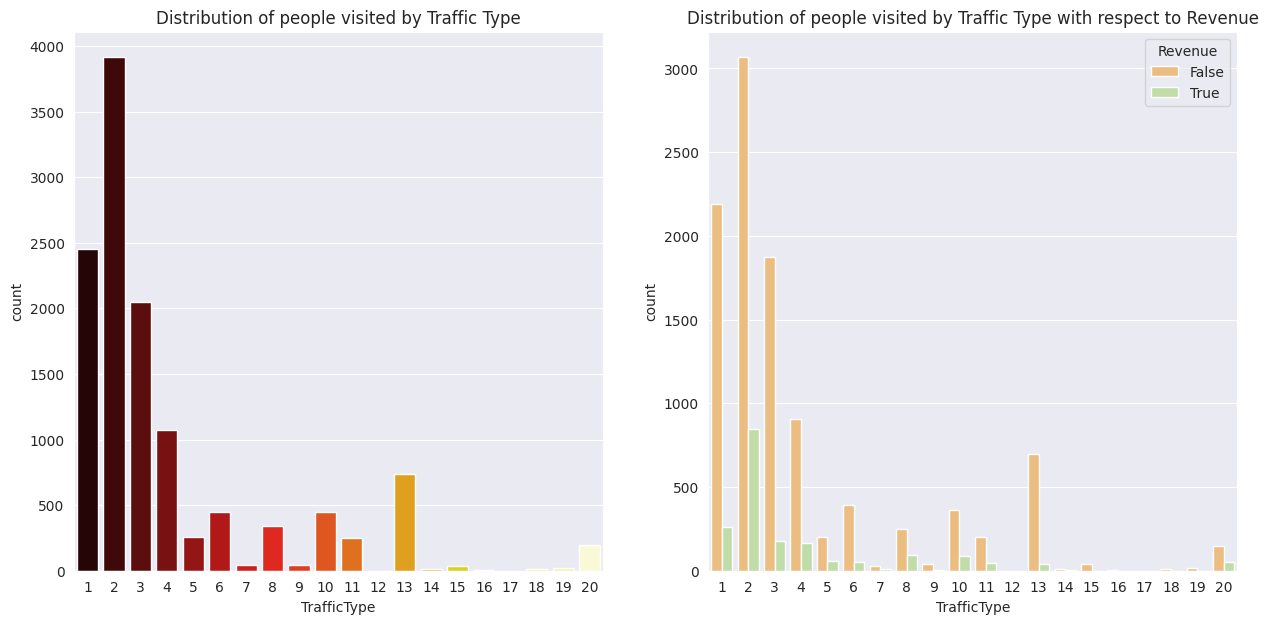

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Distribution of people visited by Traffic Type')
sns.countplot(x = data['TrafficType'] , palette='hot')

plt.subplot(1,2,2)
plt.title('Distribution of people visited by Traffic Type with respect to Revenue')
sns.countplot(x= 'TrafficType', hue = 'Revenue', data = data, palette='Spectral')
plt.show()


In [ ]:
data['Revenue'] = data['Revenue'].astype(int)
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
data['Weekend'] = data['Weekend'].astype(int)
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [ ]:
data = pd.get_dummies(data = data, columns=['Month', 'VisitorType'], drop_first=True)
data.shape

(12330, 27)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


x = data.drop(columns='Revenue')
y = data['Revenue']

# Performing Random Over Sampling
os = RandomOverSampler()
x_oversample, y_oversample = os.fit_resample(x, y)

# Splitting the oversampled data
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(x_oversample, y_oversample, test_size=0.3, random_state=42)

# Training Random Forest Classifier
rf_model_os = RandomForestClassifier(random_state=42)
rf_model_os.fit(X_train_os, y_train_os)
rf_accuracy_os = rf_model_os.score(X_test_os, y_test_os)

# Training SVM Classifier
svm_model_os = SVC(random_state=42)
svm_model_os.fit(X_train_os, y_train_os)
svm_accuracy_os = svm_model_os.score(X_test_os, y_test_os)

# Training KNN Classifier
knn_model_os = KNeighborsClassifier()
knn_model_os.fit(X_train_os, y_train_os)
knn_accuracy_os = knn_model_os.score(X_test_os, y_test_os)

print("Random Forest Accuracy:", rf_accuracy_os)
print("SVM Accuracy:", svm_accuracy_os)
print("KNN Accuracy:", knn_accuracy_os)



Random Forest Accuracy: 0.9576271186440678
SVM Accuracy: 0.7280140709945635
KNN Accuracy: 0.8407419251678926
